<a href="https://colab.research.google.com/github/krishnapriya333/Credit_Score_Classification/blob/main/Credit_Score_Classification_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**




You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.



**Exploratory Data Analysis**

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/drive/MyDrive/credit.csv')

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


**Features**

ID: Represents a unique identification of an entry

Customer_ID: Represents a unique identification of a person

Month: Represents the month of the year

Name: Represents the name of a person

Age: Represents the age of the person

SSN: Represents the social security number of a person

Occupation: Represents the occupation of the person

Annual Income: Represents the annual income of the person

Monthly Inhand Salary: Represents the monthly base salary of a person

Num Bank Accounts: Represents the number of bank accounts a person holds

Num Credit Card: Represents the number of other credit cards held by a person

Interest_Rate: Represents the interest rate on credit card

Num of Loan: Represents the number of loans taken from the bank

Type of Loan: Represents the types of loan taken by a person

Delay from due date: Represents the average number of days delayed from the payment date

Num of Delayed Payment: Represents the average number of payments delayed by a person

Changed Credit Limit: Represents the percentage change in credit card limit

Num Credit Inquiries: Represents the number of credit card inquiries

Credit Mix: Represents the classification of the mix of credits

Outstanding Debt: Represents the remaining debt to be paid (in USD)

Credit Utilization Ratio: Represents the utilization ratio of credit card

Credit History Age: Represents the age of credit history of the person

Payment of Min Amount: Represents whether only the minimum amount was paid by the person

Total EMI per month: Represents the monthly EMI payments (in USD)

Amount invested monthly: Represents the monthly amount invested by the customer (in USD)

Payment Behaviour: Represents the payment behavior of the customer (in USD)

Monthly_Balance: Represents the monthly balance amount of the customer (in USD)

Credit Score: Represents the bracket of credit score (Poor, Standard, Good)

In [4]:
df.shape

(100000, 28)

In [5]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [7]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [8]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10128
Age                             43
SSN                          12500
Occupation                      15
Annual_Income                12488
Monthly_Inhand_Salary        13241
Num_Bank_Accounts               12
Num_Credit_Card                 12
Interest_Rate                   34
Num_of_Loan                     10
Type_of_Loan                  6261
Delay_from_due_date             63
Num_of_Delayed_Payment          26
Changed_Credit_Limit          3452
Num_Credit_Inquiries            18
Credit_Mix                       3
Outstanding_Debt             12203
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          11890
Amount_invested_monthly      12261
Payment_Behaviour                6
Monthly_Balance              98494
Credit_Score                     3
dtype: int64

In [9]:
df['Credit_Score'].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [10]:
df['Credit_Mix'].value_counts()

Standard    45848
Good        30384
Bad         23768
Name: Credit_Mix, dtype: int64

In [11]:
df['Occupation'].value_counts()

Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: Occupation, dtype: int64

**Data Visualization**

  The dataset has many features that can train a Machine Learning model for credit score classification .We are try to plot a graph between a persons occupation and his credit score. This can give us some insight about how the credit score feature behaves on varying between the persons occupation.

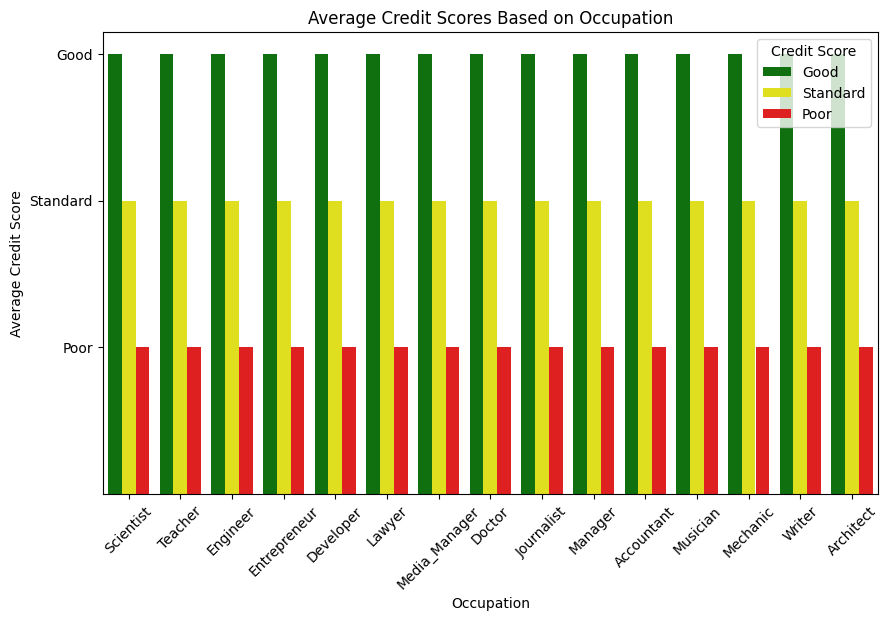

In [12]:
# Mapping Credit_Score to numerical values to calculate an average score
score_mapping = {'Poor': 1, 'Standard': 2, 'Good': 3}
df['Numeric_Score'] = df['Credit_Score'].map(score_mapping)

# Define the color palette
palette = {'Poor': 'red', 'Standard': 'yellow', 'Good': 'green'}

# Create the box plot
plt.figure(figsize=(10,6))
sns.barplot(x='Occupation', y='Numeric_Score', hue='Credit_Score',data = df,errorbar=None, palette=palette)

# Customize the plot
plt.title('Average Credit Scores Based on Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Credit Score')
plt.xticks(rotation=45)
plt.yticks(ticks=[1, 2, 3], labels=['Poor', 'Standard', 'Good'])  # Setting y-ticks labels to credit scores
plt.legend(title='Credit Score')


# Show the plot
plt.show()

There is not much difference in the credit scores of all occupations mentioned in the data.

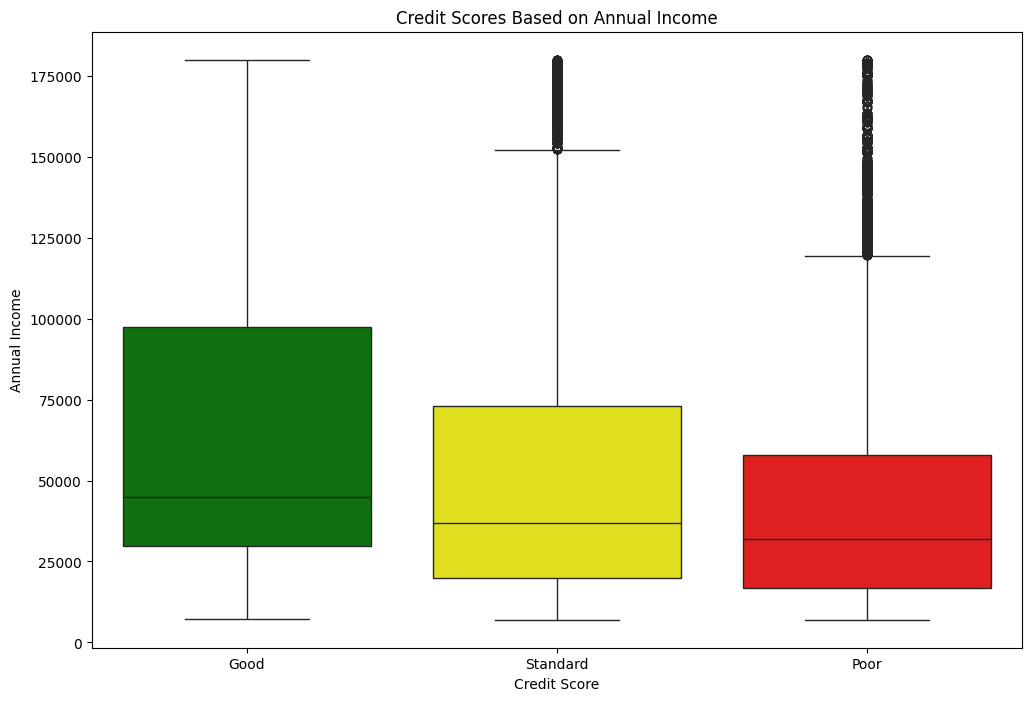

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df, hue='Credit_Score', dodge=False, palette=palette)
plt.title('Credit Scores Based on Annual Income')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.show()

According to the above visualization, the more you earn annually, the better your credit score is.

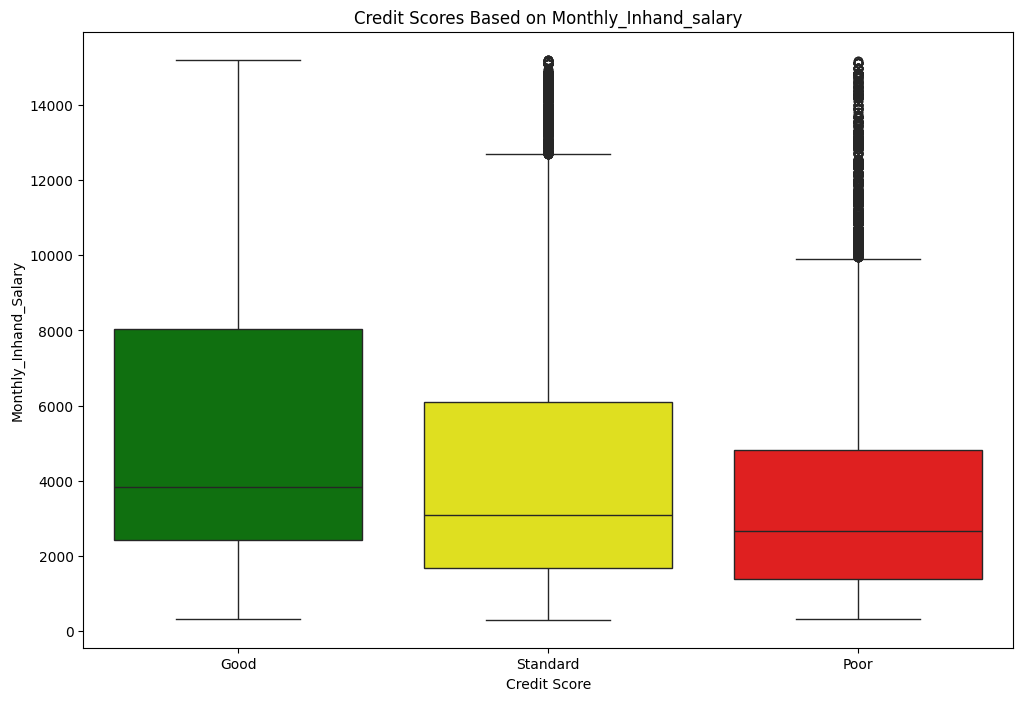

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=df, hue='Credit_Score', dodge=False, palette=palette)
plt.title('Credit Scores Based on Monthly_Inhand_salary')
plt.xlabel('Credit Score')
plt.ylabel('Monthly_Inhand_Salary')
plt.show()

Like annual income, the more monthly in-hand salary you earn, the better your credit score will become.

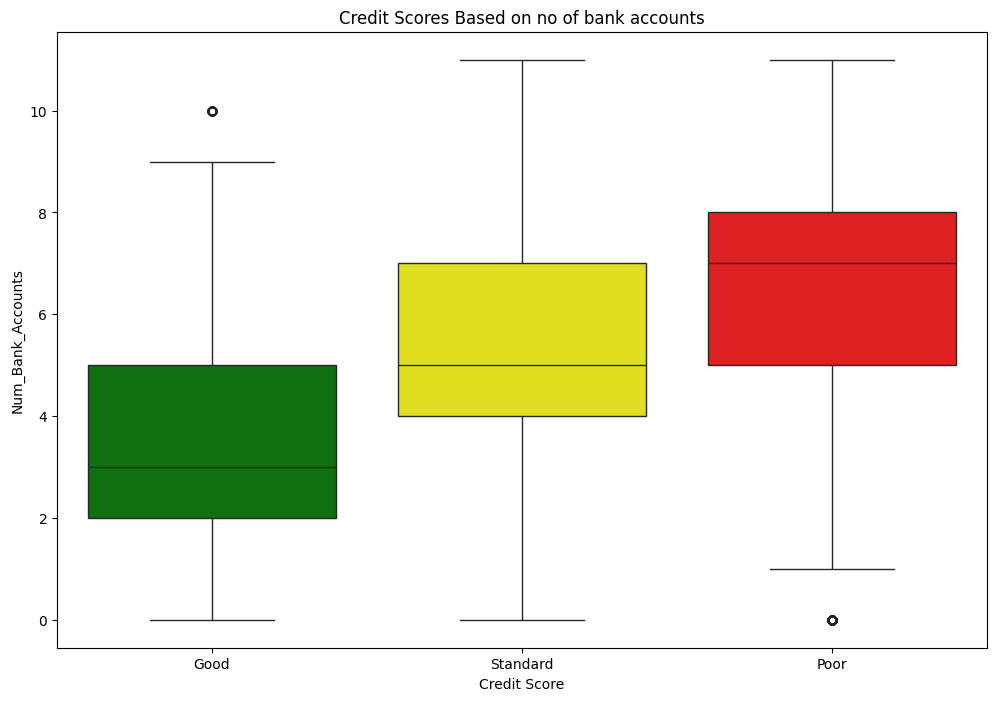

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Num_Bank_Accounts', data=df, hue='Credit_Score', dodge=False, palette=palette)
plt.title('Credit Scores Based on no of bank accounts')
plt.xlabel('Credit Score')
plt.ylabel('Num_Bank_Accounts')
plt.show()

We can see that a person should have 2-3 bank accounts only. So having more bank accounts is not good for having a good credit score

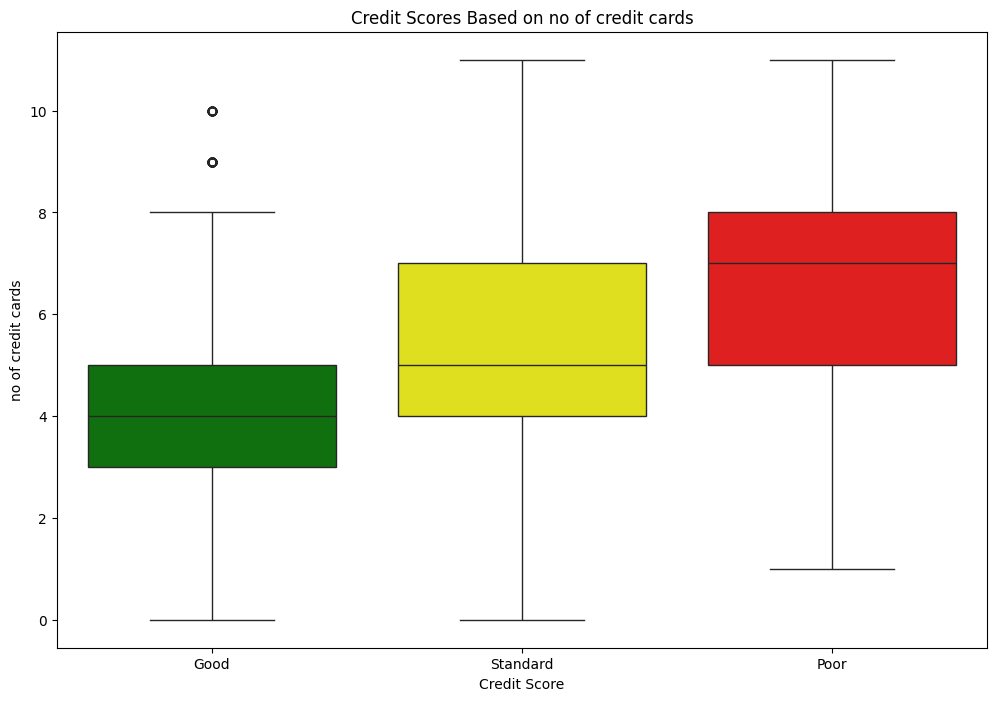

In [16]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Num_Credit_Card', data=df, hue='Credit_Score', dodge=False, palette=palette)
plt.title('Credit Scores Based on no of credit cards')
plt.xlabel('Credit Score')
plt.ylabel('no of credit cards')
plt.show()

Having more credit cards will not positively impact your credit scores. Having 3 – 5 credit cards is good for your credit score.

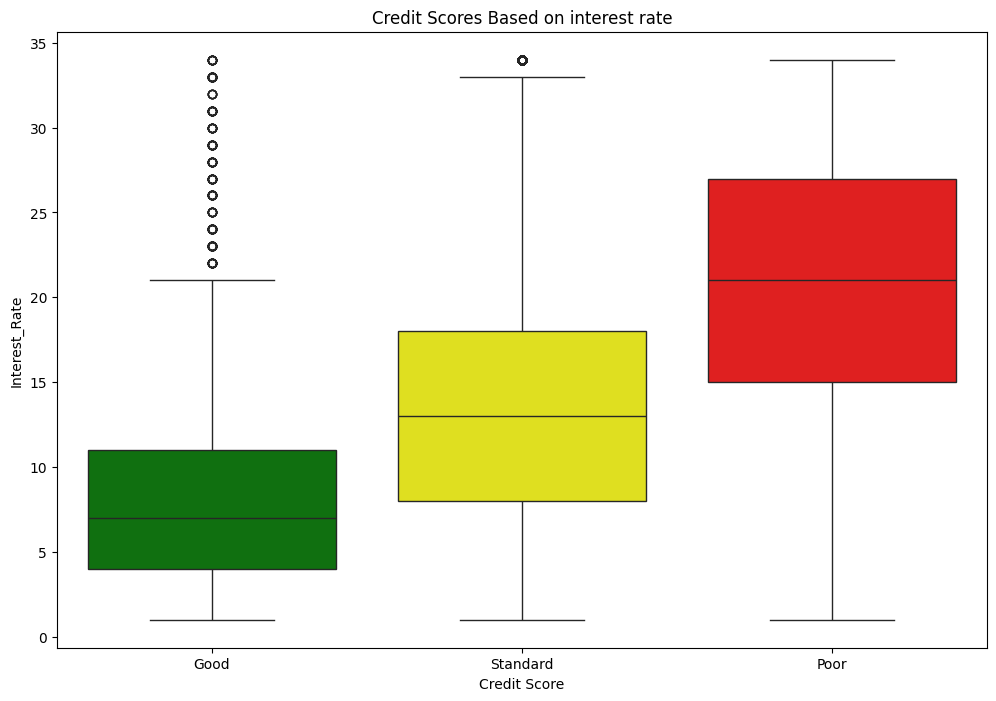

In [17]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Interest_Rate', data=df, hue='Credit_Score', dodge=False, palette=palette)
plt.title('Credit Scores Based on interest rate')
plt.xlabel('Credit Score')
plt.ylabel('Interest_Rate')
plt.show()

If the average interest rate is 4 - 11%, the credit score is good. Having an average interest rate of more than 15% is bad for your credit scores.

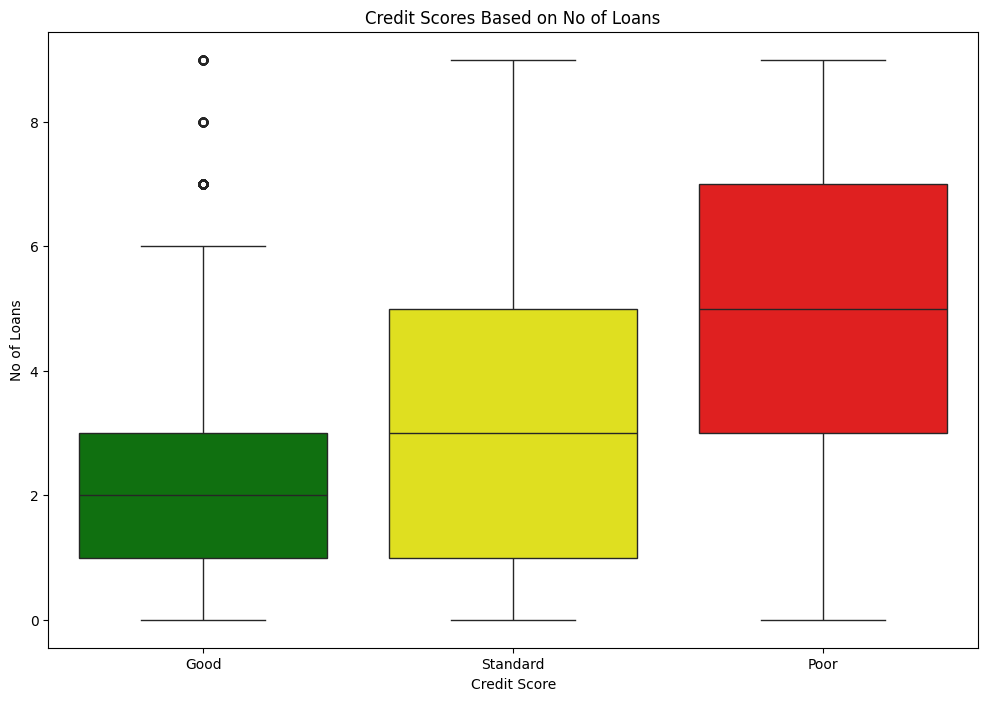

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Num_of_Loan', data=df, hue='Credit_Score', dodge=False, palette=palette)
plt.title('Credit Scores Based on No of Loans')
plt.xlabel('Credit Score')
plt.ylabel('No of Loans')
plt.show()

To have a good credit score, you should not take more than 1 - 3 loans at a time. Having more than three loans at a time will negatively impact your credit scores.

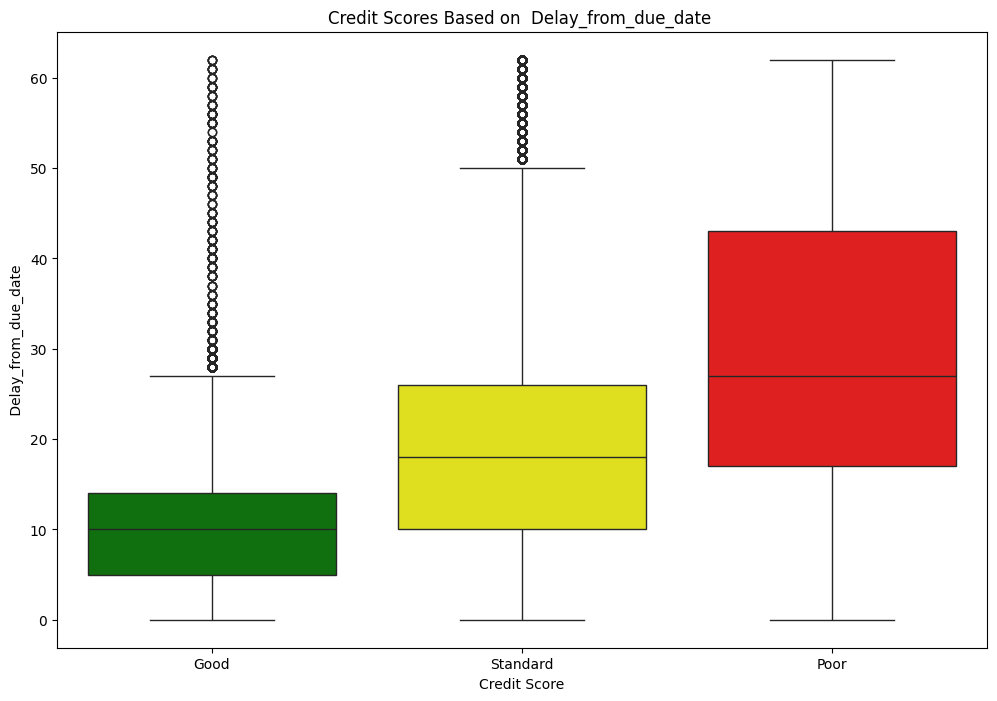

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Delay_from_due_date', data=df, hue='Credit_Score', dodge=False, palette=palette)
plt.title('Credit Scores Based on  Delay_from_due_date ')
plt.xlabel('Credit Score')
plt.ylabel(' Delay_from_due_date ')
plt.show()

So you can delay your credit card payment 5 – 15 days from the due date. Delaying your payments for more than 17 days from the due date will impact your credit scores negatively.

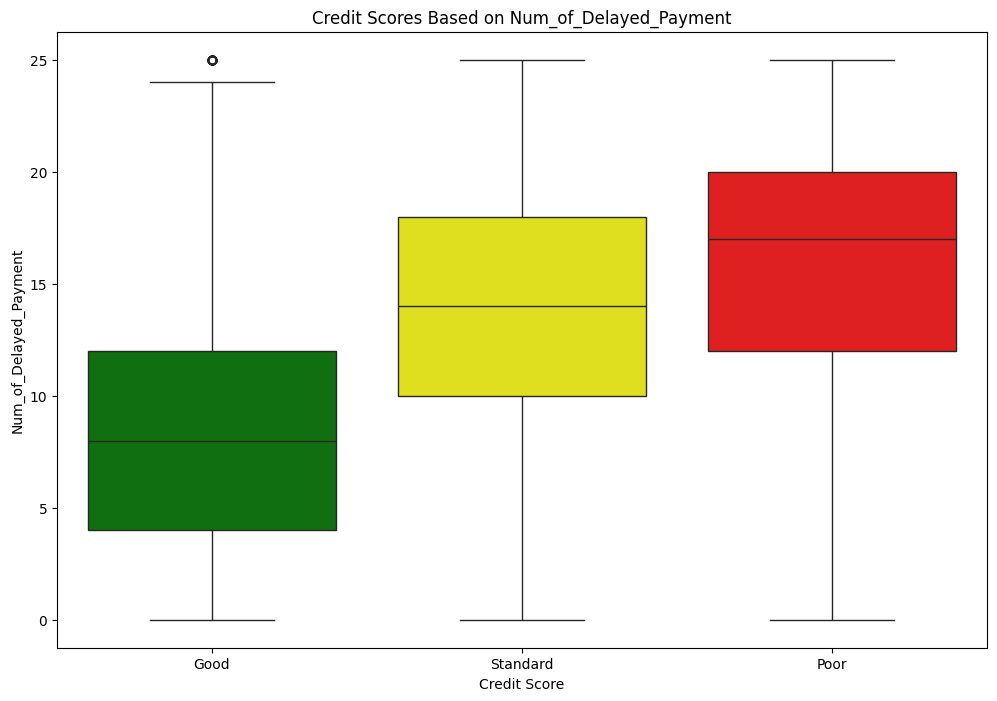

In [20]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=df, hue='Credit_Score', dodge=False, palette=palette)
plt.title('Credit Scores Based on Num_of_Delayed_Payment')
plt.xlabel('Credit Score')
plt.ylabel('Num_of_Delayed_Payment')
plt.show()

So delaying 4 - 12 payments from the due date will not affect your credit scores. But delaying more than 12 payments from the due date will affect your credit scores negatively

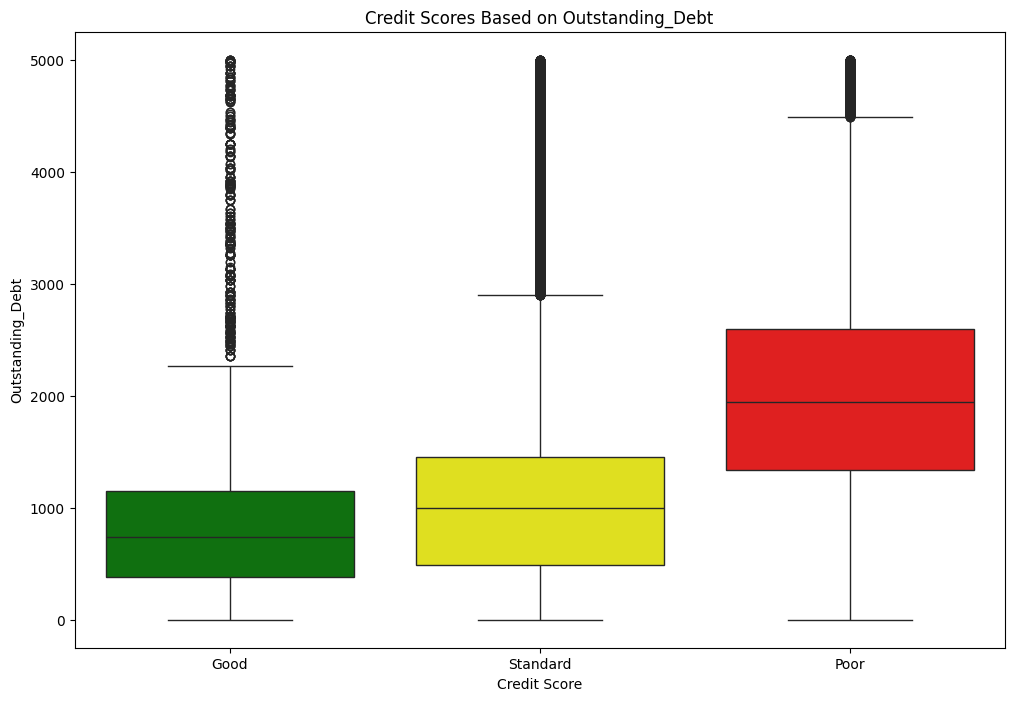

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Outstanding_Debt', data=df, hue='Credit_Score', dodge=False, palette=palette)
plt.title('Credit Scores Based on Outstanding_Debt')
plt.xlabel('Credit Score')
plt.ylabel('Outstanding_Debt')
plt.show()

An outstanding debt of above 1300 will  affect your credit scores negatively

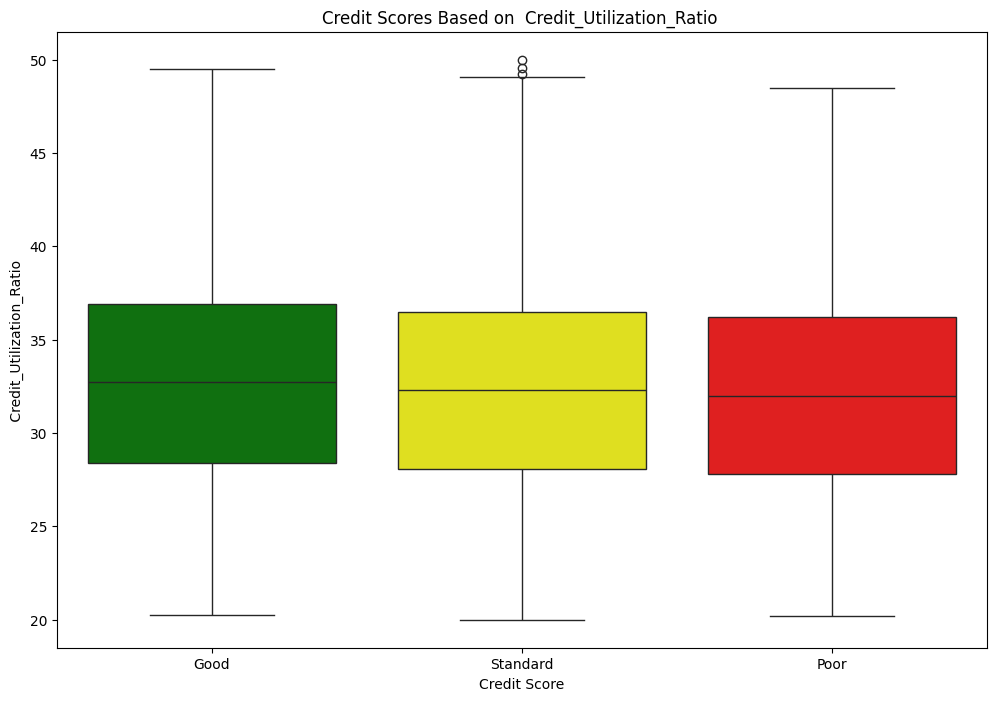

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=df, hue='Credit_Score', dodge=False, palette=palette)
plt.title('Credit Scores Based on  Credit_Utilization_Ratio ')
plt.xlabel('Credit Score')
plt.ylabel(' Credit_Utilization_Ratio ')
plt.show()

We can say that  your credit utilization ratio doesn't affect your credit scores.

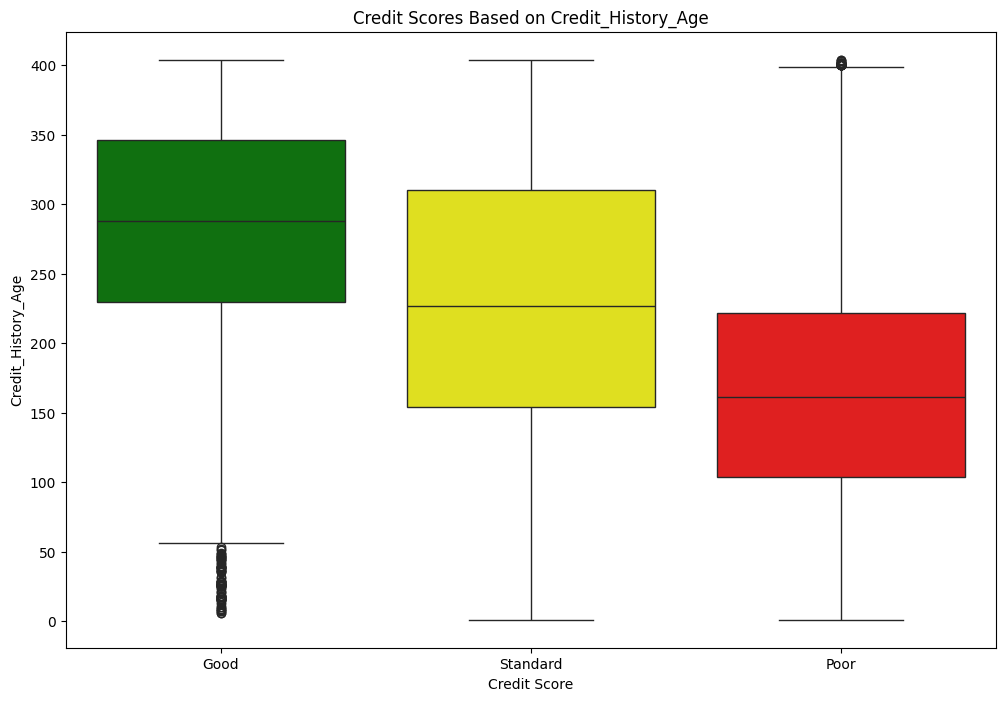

In [23]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Credit_History_Age', data=df, hue='Credit_Score', dodge=False, palette=palette)
plt.title('Credit Scores Based on Credit_History_Age')
plt.xlabel('Credit Score')
plt.ylabel('Credit_History_Age')
plt.show()

So, having a long credit history results in better credit scores

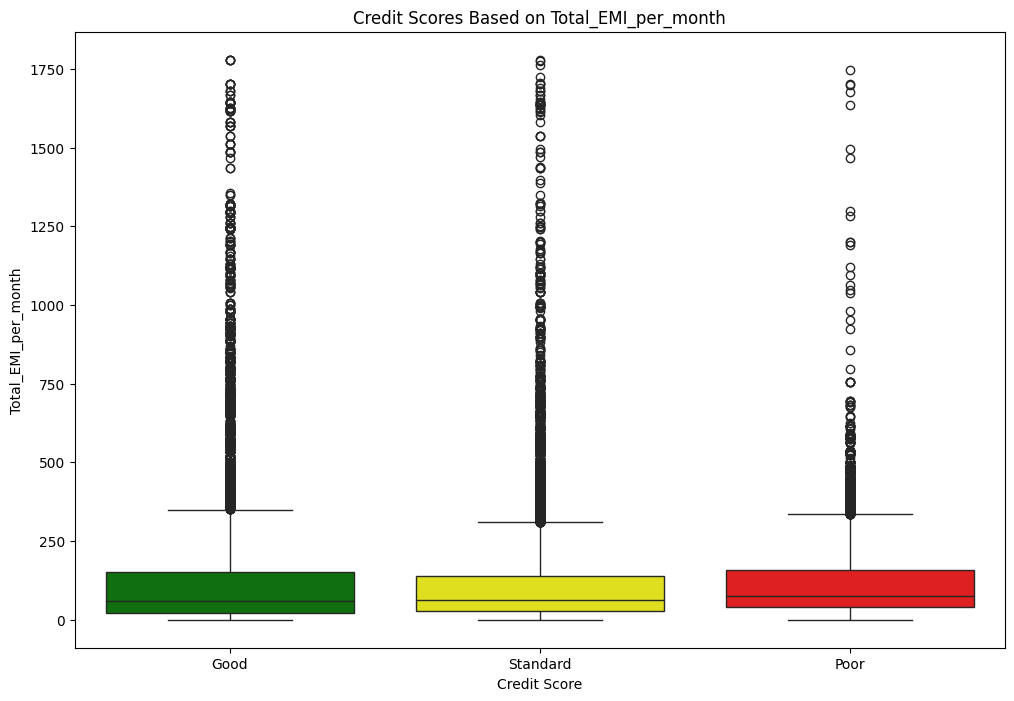

In [24]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Total_EMI_per_month', data=df, hue='Credit_Score', dodge=False, palette=palette)
plt.title('Credit Scores Based on Total_EMI_per_month')
plt.xlabel('Credit Score')
plt.ylabel('Total_EMI_per_month')
plt.show()

The number of EMIs you are paying in a month doesn’t affect much on credit scores.

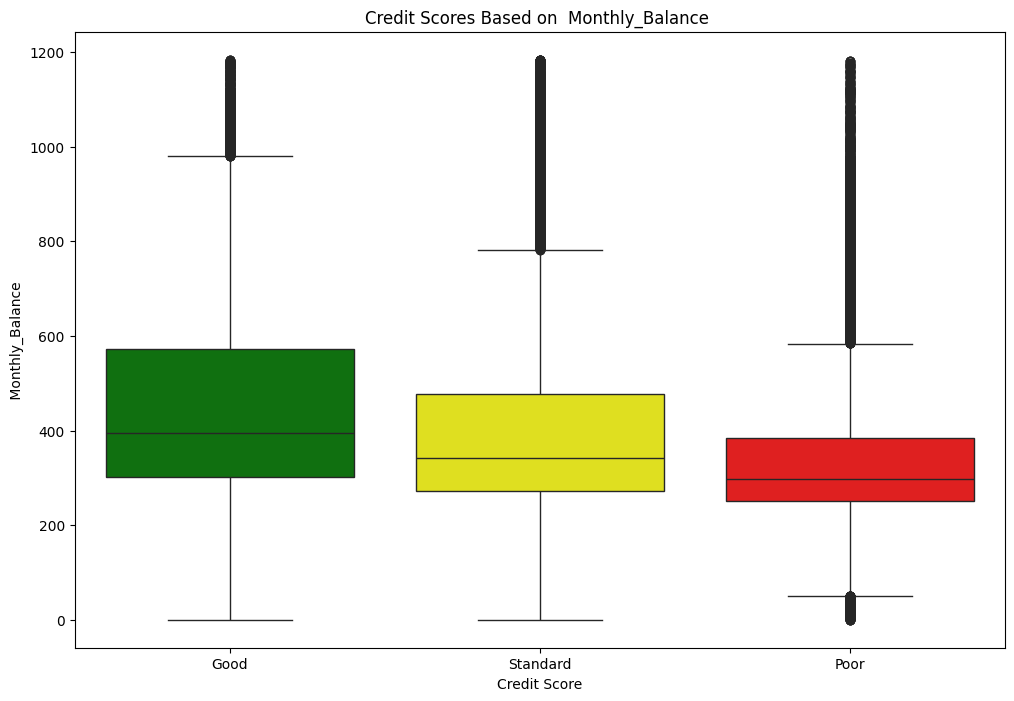

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Monthly_Balance', data=df, hue='Credit_Score', dodge=False, palette=palette)
plt.title('Credit Scores Based on  Monthly_Balance ')
plt.xlabel('Credit Score')
plt.ylabel(' Monthly_Balance ')
plt.show()

So, having a high monthly balance in your account at the end of the month is good for your credit scores. A monthly balance of less than $250 is bad for credit scores.

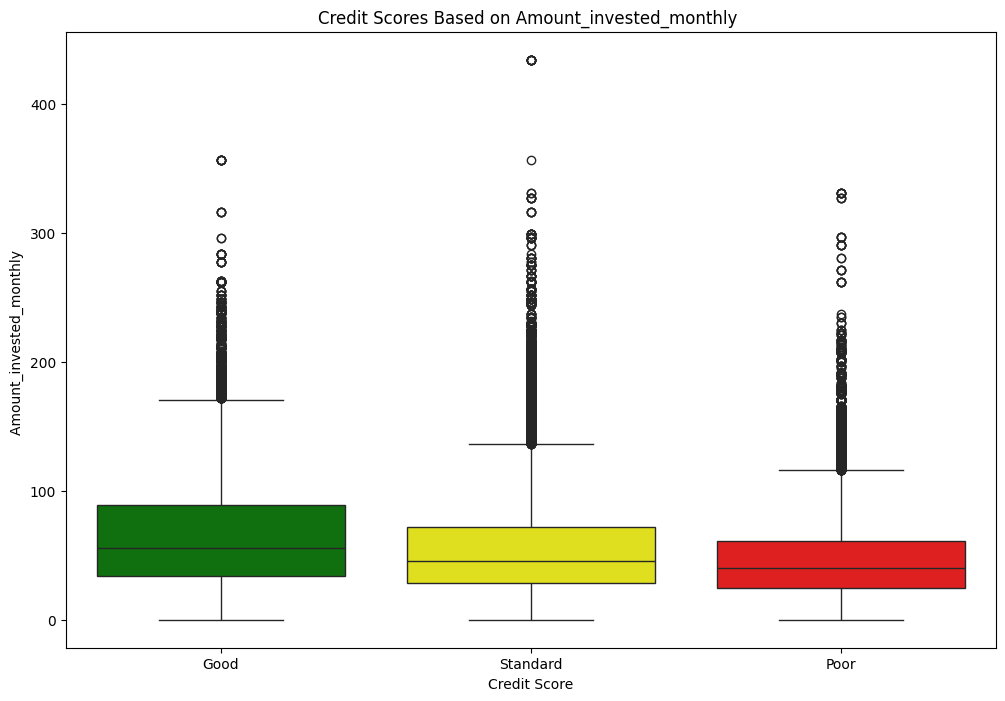

In [26]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Credit_Score', y='Amount_invested_monthly', data=df, hue='Credit_Score', dodge=False, palette=palette)
plt.title('Credit Scores Based on Amount_invested_monthly ')
plt.xlabel('Credit Score')
plt.ylabel('Amount_invested_monthly ')
plt.show()

The amount of money you invest monthly doesn’t affect your credit scores

**Data Preprocessing**

 **Checking Null Values**

In [27]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Numeric_Score               0
dtype: int64

There are no missing values in the dataset

 **Data Splitting**

One more important feature (Credit Mix) in the dataset is valuable for determining credit scores. The credit mix feature tells about the types of credits and loans you have taken.

As the Credit_Mix column is categorical, I will transform it into a numerical feature so that we can use it to train a Machine Learning model for the task of credit score classification:
 We need to convert the categorical columns into the numerical ones before splitting the data. So, I am encoding the credit_mix column as it is important for credit score.

In [28]:
df["Credit_Mix"] = df["Credit_Mix"].map({"Standard": 1,
                               "Good": 2,
                               "Bad": 0})


In [29]:
df[["Credit_Mix"]]

,Credit_Mix
0,2
1,2
2,2
3,2
4,2
...,...
99995,2
99996,2
99997,2
99998,2


In [30]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Numeric_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good,3
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good,3
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good,3
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good,3
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good,3


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

We split the data into features and labels by selecting the features we found important for our model

In [32]:
from sklearn.model_selection import train_test_split
X = np.array(df[["Annual_Income", "Monthly_Inhand_Salary",
                   "Num_Bank_Accounts", "Num_Credit_Card",
                   "Interest_Rate", "Num_of_Loan",
                   "Delay_from_due_date", "Num_of_Delayed_Payment",
                   "Credit_Mix", "Outstanding_Debt",
                   "Credit_History_Age", "Monthly_Balance"]])
y = np.array(df[["Credit_Score"]])

In [33]:
X

array([[1.91141200e+04, 1.82484333e+03, 3.00000000e+00, ...,
        8.09980000e+02, 2.65000000e+02, 3.12494089e+02],
       [1.91141200e+04, 1.82484333e+03, 3.00000000e+00, ...,
        8.09980000e+02, 2.66000000e+02, 2.84629162e+02],
       [1.91141200e+04, 1.82484333e+03, 3.00000000e+00, ...,
        8.09980000e+02, 2.67000000e+02, 3.31209863e+02],
       ...,
       [3.96289900e+04, 3.35941583e+03, 4.00000000e+00, ...,
        5.02380000e+02, 3.80000000e+02, 5.16809083e+02],
       [3.96289900e+04, 3.35941583e+03, 4.00000000e+00, ...,
        5.02380000e+02, 3.81000000e+02, 3.19164979e+02],
       [3.96289900e+04, 3.35941583e+03, 4.00000000e+00, ...,
        5.02380000e+02, 3.82000000e+02, 3.93673696e+02]])

In [34]:
y

array([['Good'],
       ['Good'],
       ['Good'],
       ...,
       ['Poor'],
       ['Standard'],
       ['Poor']], dtype=object)

**Splitting the dataset to Testing and Training Set**

In [35]:
# Splitting data in Testing and Training Sets with 33% percent data being used for Testing
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=42)

In [36]:
X_train.shape

(67000, 12)

In [37]:
y_train.shape

(67000, 1)

In [38]:
X_test.shape

(33000, 12)

In [39]:
y_test.shape

(33000, 1)